In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import preprocessing as ps
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", palette="Set2")

In [6]:
df=pd.read_csv('../datasets/co2_datasets.csv')
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,NaN,7.0,8.6,33.0,200.0,6.0,3.0
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29.0,232.0,5.0,6.0
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27.0,242.0,5.0,6.0
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29.0,230.0,5.0,7.0


<section>
  <h2>Dataset Feature Descriptions</h2>
  <ul>
    <li><strong>Model Year</strong>: Year the vehicle model was released.</li>
    <li><strong>Make</strong>: Manufacturer of the vehicle (e.g., Toyota, Ford).</li>
    <li><strong>Model</strong>: Specific model name of the vehicle.</li>
    <li><strong>Vehicle Class</strong>: Classification of the vehicle (e.g., SUV, Sedan).</li>
    <li><strong>Engine Size (L)</strong>: Engine size in liters.</li>
    <li><strong>Cylinders</strong>: Number of engine cylinders.</li>
    <li><strong>Transmission</strong>: Type of transmission (e.g., Automatic, Manual).</li>
    <li><strong>Fuel Type</strong>: Type of fuel the vehicle uses (e.g., Gasoline, Diesel, Electric).</li>
    <li><strong>Fuel Consumption (City) (L/100 km)</strong>: Fuel consumption in city driving conditions.</li>
    <li><strong>Fuel Consumption (Highway) (L/100 km)</strong>: Fuel consumption in highway driving conditions.</li>
    <li><strong>Fuel Consumption (Combined) (L/100 km)</strong>: Combined city and highway fuel consumption.</li>
    <li><strong>Fuel Consumption (Combined) (mpg)</strong>: Combined fuel consumption measured in miles per gallon.</li>
    <li><strong>CO2 Emissions (g/km)</strong>: Amount of CO2 emitted per kilometer.</li>
    <li><strong>CO2 Rating</strong>: Rating based on CO2 emissions (lower is better).</li>
    <li><strong>Smog Rating</strong>: Rating based on emissions contributing to smog (higher is better).</li>
  </ul>
</section>


<h3>Data Overview</h3>

In [7]:
ps.dataset_analysis(df,target_column='CO2 Emissions(g/km)')


Dataset Shape (Rows & Columns)
Rows :- 945
Columns :- 15
Unique Rows: 945 (100.00%)
Duplicate Rows: 0 (0.00%)

Columns with Null Values and Null Value Counts
Fuel Type: 1 null values
Fuel Consumption (City (L/100 km): 14 null values
Fuel Consumption(Hwy (L/100 km)): 15 null values
Fuel Consumption(Comb (mpg)): 14 null values
CO2 Emissions(g/km): 11 null values
CO2 Rating: 13 null values
Smog Rating: 18 null values

Data Type Wise Column Count
float64    8
object     5
int64      2
Name: count, dtype: int64

Discrete And Continous Data Analysis
Discrete Text Columns : Make, Model, Vehicle Class, Transmission, Fuel Type


Discrete Numeric Columns : Model Year, Cylinders


Continuous Columns : Engine Size(L), Fuel Consumption (City (L/100 km), Fuel Consumption(Hwy (L/100 km)), Fuel Consumption(Comb (L/100 km)), Fuel Consumption(Comb (mpg)), CO2 Emissions(g/km), CO2 Rating, Smog Rating


Unknown Columns : -----

Skewness of Numerical Columns
Engine Size(L): 0.94 -> Mild Positive Skew. 
Fue

TypeError: '<' not supported between instances of 'float' and 'str'

<h3>Data Preprocessing & EDA</h3>

In [8]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,NaN,7.0,8.6,33.0,200.0,6.0,3.0
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29.0,232.0,5.0,6.0
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27.0,242.0,5.0,6.0
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29.0,230.0,5.0,7.0


In [9]:
df.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [17]:
df.shape

(945, 16)

In [18]:
df=df.dropna(axis=0)
df.shape

(861, 16)

In [10]:
df.select_dtypes(include='object').columns


Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object')

In [19]:
for col in df.select_dtypes(include='object').columns:
    print(f'{col} : {df[col].nunique()}')

Make : 39
Model : 667
Vehicle Class : 14
Transmission : 23
Fuel Type : 4
fmodel : 258


In [21]:
df['Make'].unique()

array(['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'BMW',
       'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge',
       'FIAT', 'Ford', 'Genesis', 'GMC', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
       'Lincoln', 'Maserati', 'Mazda', 'Mercedes-Benz', 'MINI',
       'Mitsubishi', 'Nissan', 'Porsche', 'Ram', 'Rolls-Royce', 'Subaru',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [22]:
df['Model'].unique()[:10]

array(['MDX SH-AWD', 'RDX SH-AWD', 'RDX SH-AWD A-SPEC', 'TLX SH-AWD',
       'TLX SH-AWD A-SPEC', 'TLX Type S (Performance Tire)', 'Giulia',
       'Giulia AWD', 'Giulia Quadrifoglio', 'Stelvio'], dtype=object)

In [23]:
df['fmodel']=df['Model'].map(lambda x: x.split(' ')[0])

In [24]:
df['fmodel'].nunique()

258

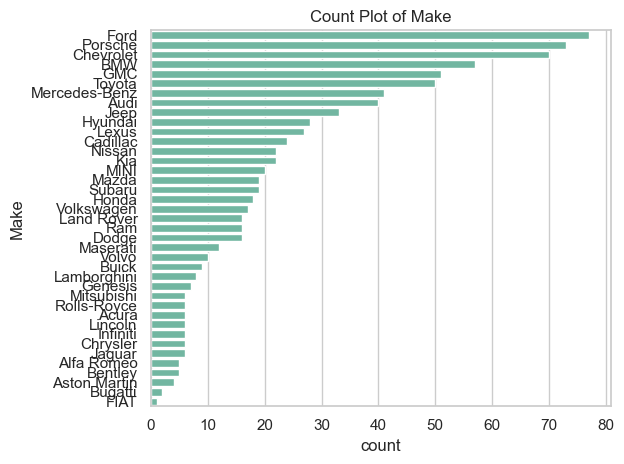

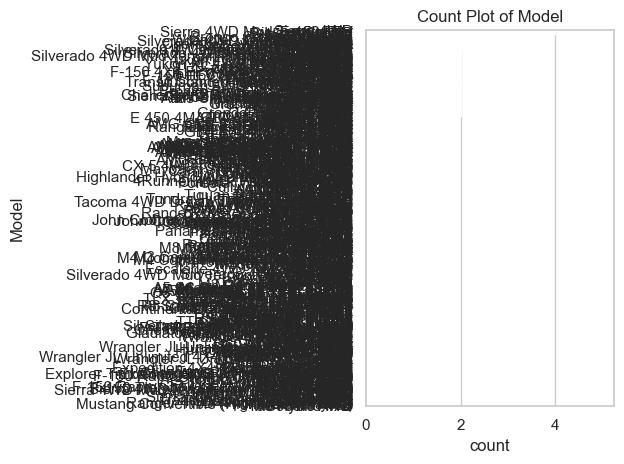

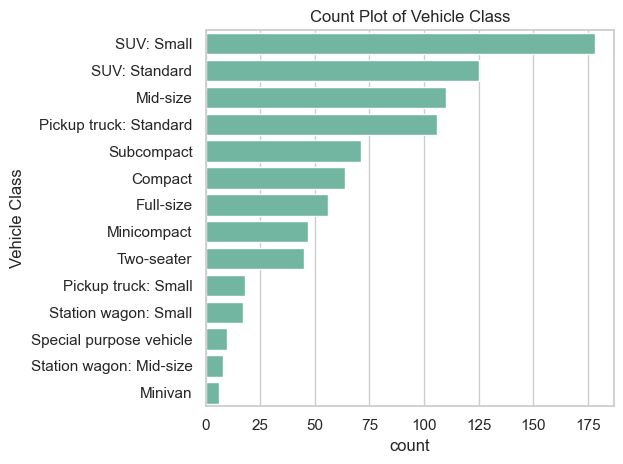

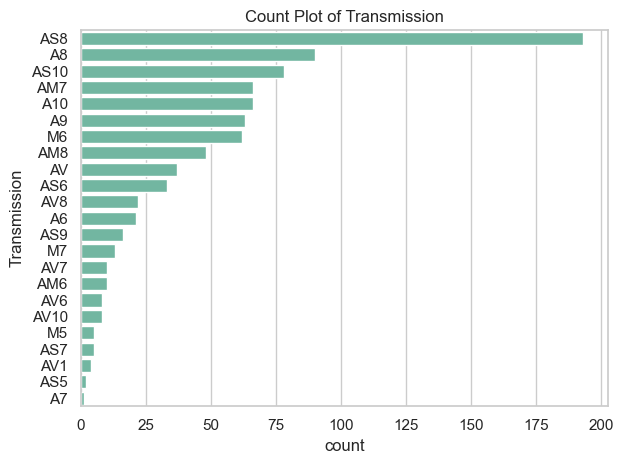

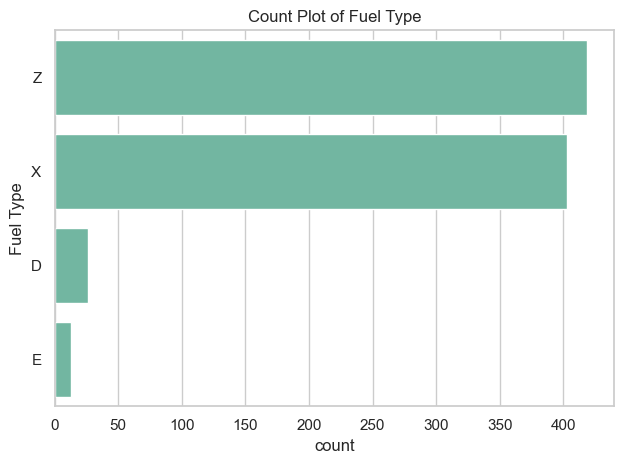

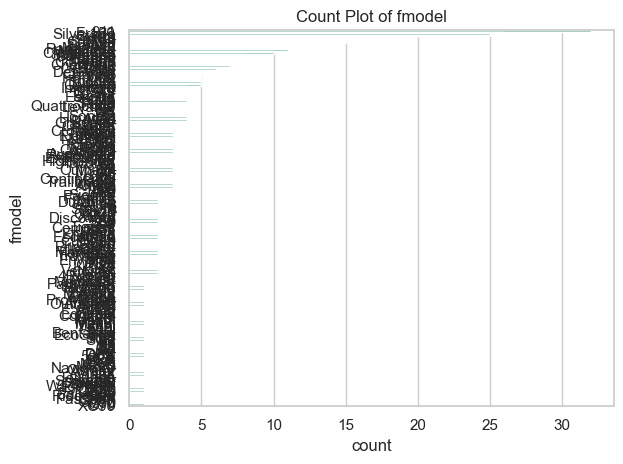

In [25]:
for col in df.select_dtypes(include='object').columns:
    # Get value counts and sort (descending by default)
    sorted_order = df[col].value_counts().index

    # Plot with sorted order
    sns.countplot(data=df, y=col, order=sorted_order)
    plt.title(f'Count Plot of {col}')
    plt.tight_layout()
    plt.show()

In [28]:
fmodel_df=df['fmodel'].value_counts().reset_index()

In [29]:
fmodel_df.head()

,fmodel,count
0,911,32
1,F-150,26
2,Silverado,25
3,Sierra,25
4,718,19


In [35]:
less_than_fmodel_df=fmodel_df[fmodel_df['count']<5]['fmodel'].to_list()

In [36]:
df['fmodel']=df['fmodel'].map(lambda x: 'Other' if x in less_than_fmodel_df else x)
df['fmodel'].nunique()

39

In [38]:
df.head(2)

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating,fmodel
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0,Other
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29.0,232.0,5.0,6.0,Other


In [39]:
df=df.drop(columns=['Model Year','Model'],axis=1)

In [40]:
df.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating,fmodel
1,Acura,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0,Other
2,Acura,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29.0,232.0,5.0,6.0,Other
3,Acura,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27.0,242.0,5.0,6.0,Other
4,Acura,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29.0,230.0,5.0,7.0,Other
5,Acura,Compact,2.0,4,AS10,Z,11.3,8.1,9.8,29.0,231.0,5.0,7.0,Other


In [41]:
df.columns

Index(['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission',
       'Fuel Type', 'Fuel Consumption (City (L/100 km)',
       'Fuel Consumption(Hwy (L/100 km))', 'Fuel Consumption(Comb (L/100 km))',
       'Fuel Consumption(Comb (mpg))', 'CO2 Emissions(g/km)', 'CO2 Rating',
       'Smog Rating', 'fmodel'],
      dtype='object')

In [46]:
df.columns = [
    'make',                     # Make of the car
    'vehicle_class',            # Class/Type of vehicle
    'engine_liters',            # Engine size in liters
    'cylinders',                # Number of cylinders
    'transmission_type',        # Type of transmission
    'fuel_type',                # Fuel type (e.g. Gasoline, Diesel)

    # Fuel Consumption grouped:
    'fuel_city_l_100km',        # City fuel consumption
    'fuel_hwy_l_100km',         # Highway fuel consumption
    'fuel_comb_l_100km',        # Combined fuel consumption (L/100km)
    'fuel_comb_mpg',            # Combined fuel consumption (mpg)

    # Emissions & Ratings:
    'co2_emission',        # CO2 emissions
    'co2_rating',               # CO2 rating
    'smog_rating',              # Smog rating

    'model_name'                # Raw model name (from fmodel)
]

In [47]:
df.head()

,make,vehicle_class,engine_liters,cylinders,transmission_type,fuel_type,fuel_city_l_100km,fuel_hwy_l_100km,fuel_comb_l_100km,fuel_comb_mpg,co2_emission,co2_rating,smog_rating,model_name
1,Acura,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0,Other
2,Acura,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29.0,232.0,5.0,6.0,Other
3,Acura,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27.0,242.0,5.0,6.0,Other
4,Acura,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29.0,230.0,5.0,7.0,Other
5,Acura,Compact,2.0,4,AS10,Z,11.3,8.1,9.8,29.0,231.0,5.0,7.0,Other


In [49]:
df.select_dtypes(include=['float64','int64']).columns


Index(['engine_liters', 'cylinders', 'fuel_city_l_100km', 'fuel_hwy_l_100km',
       'fuel_comb_l_100km', 'fuel_comb_mpg', 'co2_emission', 'co2_rating',
       'smog_rating'],
      dtype='object')

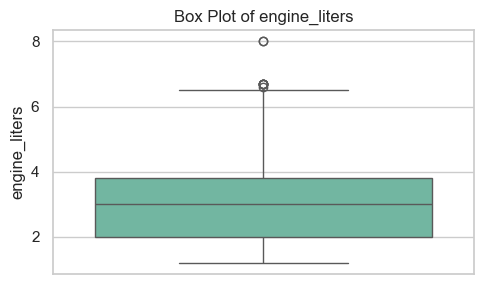

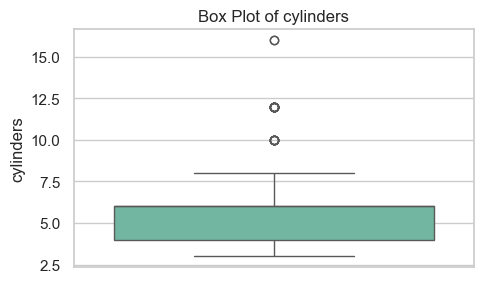

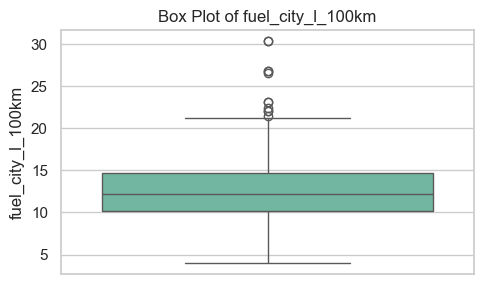

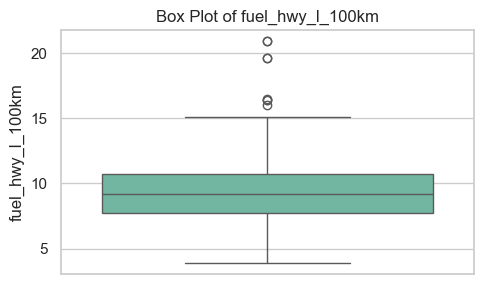

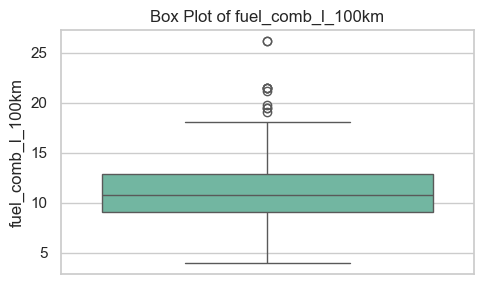

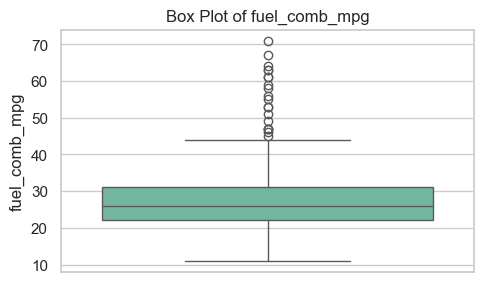

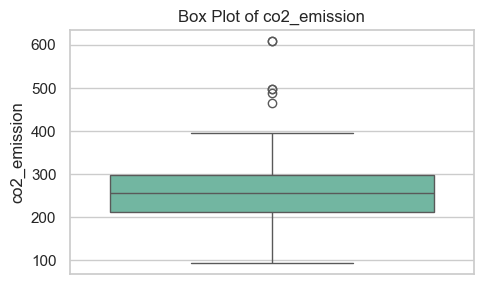

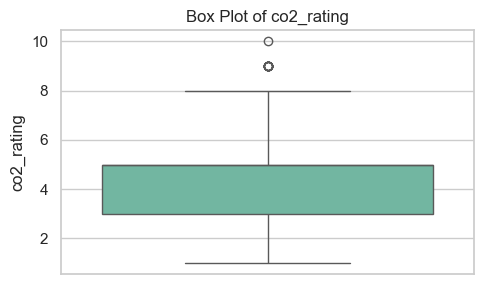

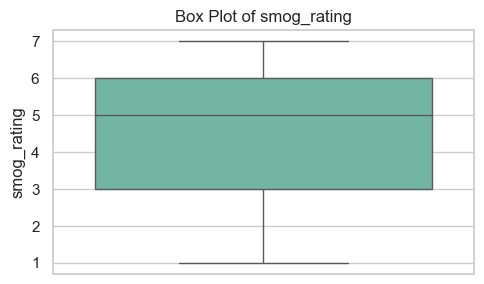

In [52]:
for col in df.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

In [56]:
#outliers
print(df[df['engine_liters']>7].shape)
print(df[df['cylinders']>10].shape)
print(df[df['fuel_city_l_100km']>25].shape)

print(df[df['fuel_hwy_l_100km']>15].shape)
print(df[df['fuel_comb_l_100km']>29].shape)
print(df[df['co2_emission']>450].shape)

(2, 14)
(17, 14)
(5, 14)
(10, 14)
(0, 14)
(6, 14)


In [57]:
df.shape

(861, 14)

In [59]:
df = df[
    ~(
        (df['engine_liters'] > 7) |
        (df['cylinders'] > 10) |
        (df['fuel_city_l_100km'] > 25) |
        (df['fuel_hwy_l_100km'] > 15) |
        (df['fuel_comb_l_100km'] > 29) |
        (df['co2_emission'] > 450)
    )
]


In [60]:
df.shape

(838, 14)

In [61]:
df.head()

,make,vehicle_class,engine_liters,cylinders,transmission_type,fuel_type,fuel_city_l_100km,fuel_hwy_l_100km,fuel_comb_l_100km,fuel_comb_mpg,co2_emission,co2_rating,smog_rating,model_name
1,Acura,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0,Other
2,Acura,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29.0,232.0,5.0,6.0,Other
3,Acura,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27.0,242.0,5.0,6.0,Other
4,Acura,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29.0,230.0,5.0,7.0,Other
5,Acura,Compact,2.0,4,AS10,Z,11.3,8.1,9.8,29.0,231.0,5.0,7.0,Other


In [62]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in df.select_dtypes(include='object').columns:
    df[i]=encoder.fit_transform(df[i])

df.head()

,make,vehicle_class,engine_liters,cylinders,transmission_type,fuel_type,fuel_city_l_100km,fuel_hwy_l_100km,fuel_comb_l_100km,fuel_comb_mpg,co2_emission,co2_rating,smog_rating,model_name
1,0,7,3.5,6,8,3,12.6,9.4,11.2,25.0,263.0,4.0,5.0,27
2,0,7,2.0,4,8,3,11.0,8.6,9.9,29.0,232.0,5.0,6.0,27
3,0,7,2.0,4,8,3,11.3,9.1,10.3,27.0,242.0,5.0,6.0,27
4,0,0,2.0,4,8,3,11.2,8.0,9.8,29.0,230.0,5.0,7.0,27
5,0,0,2.0,4,8,3,11.3,8.1,9.8,29.0,231.0,5.0,7.0,27


In [66]:
df.corr()['co2_emission'].sort_values()

co2_rating          -0.965102
fuel_comb_mpg       -0.928241
smog_rating         -0.477990
transmission_type   -0.360591
make                -0.255003
model_name           0.008062
fuel_type            0.159960
vehicle_class        0.190711
engine_liters        0.796284
cylinders            0.805318
fuel_hwy_l_100km     0.945731
fuel_city_l_100km    0.966587
fuel_comb_l_100km    0.978161
co2_emission         1.000000
Name: co2_emission, dtype: float64

In [67]:
df=df.drop(columns='model_name')

In [68]:
df.to_csv('../datasets/clean_dataset.csv',index=False)